
# <span style="color:rgb(213,80,0)">**SPR Biosensor**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 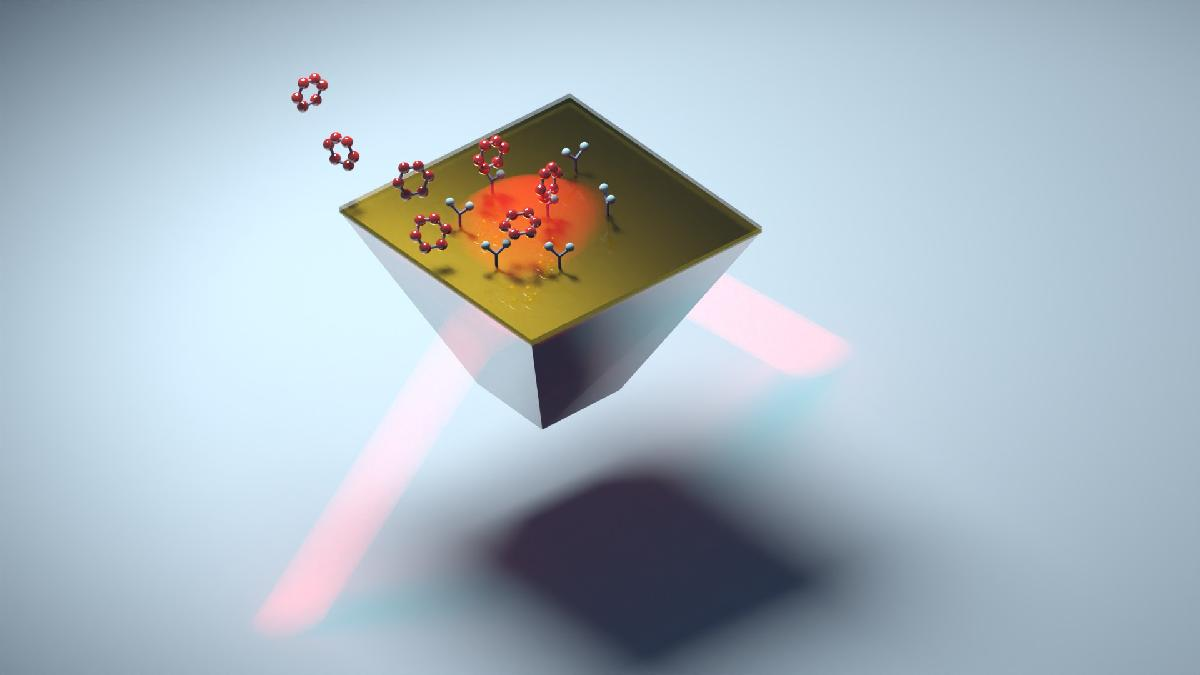    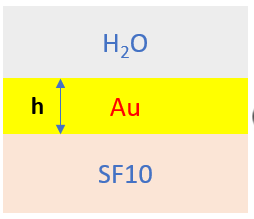


[High performance multi\-spectral interrogation for surface plasmon resonance imaging sensors](https://hal-iogs.archives-ouvertes.fr/hal-00908823)


Alexandra Sereda, Julien Moreau, Michael Canva, Emmanuel Maillart


 *Biosensors and Bioelectronics*, 2014, 54, pp.175\-180. [⟨10.1016/j.bios.2013.10.049⟩](https://dx.doi.org/10.1016/j.bios.2013.10.049)

## Data

In [1]:
% Refractive indices
n_H2O = 1.333;
%  {supstrat layers substrat}
index = {n_H2O , IndexVal('Au'), IndexVal('SF10')};
%
% Geometry
geom = 0.05; % Gold layer Thickness (µm)


## Spectrum Computation versus incident angle


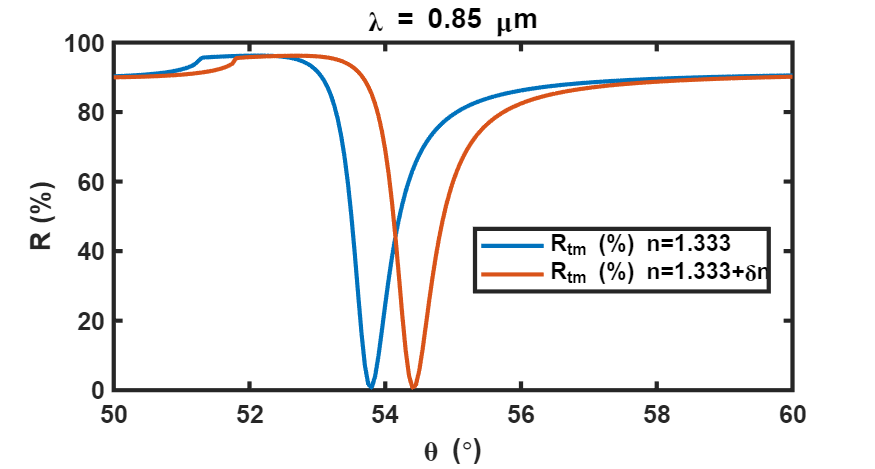

In [2]:
% Incident Plane Wave
lambda = .85;                       % Wavelength(µm)
theta = linspace(50,60,201)*pi/180; % Incident angle (rd)
inc = -1;                           % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle (theta) for a defined wavelength
% n_H2O = 1.333
R_tem1 = Spectrum(index,geom,lambda,theta,inc); % R: TM-TM TM-TE TE-TM TE-TE
%
% n_H2O + Dn : reflectivity variation
index2 = {n_H2O+1e-2 , IndexVal('Au') , IndexVal('SF10')};
R_tem2 = Spectrum(index2,geom,lambda,theta,inc);
%
% Plot Reflection versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,R_tem1(:,1),R_tem2(:,1)),
legend('R_{tm} (%) n=1.333','R_{tm} (%) n=1.333+\deltan '), ylabel('R (%)')

## Field Computation for a defined polarization (pol = 0 (TE) or 2 (TM) )


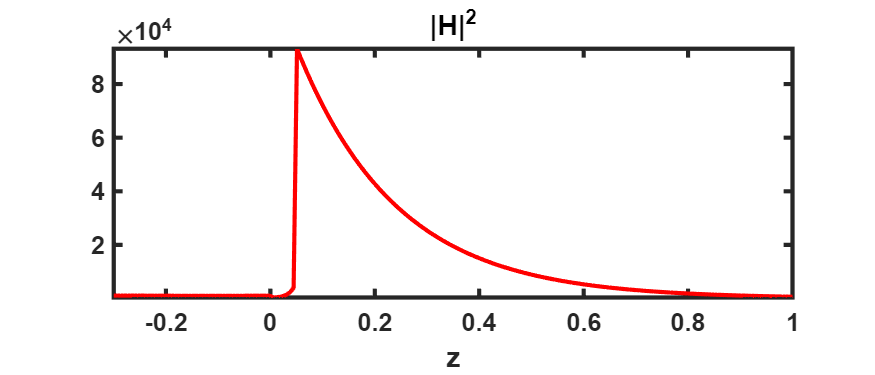

In [3]:
lambda = 0.85;
theta = 53.8*pi/180;
inc = -1;           % inc = -1: from down, +1: from up
%
% S-matrix calculation
s = Spectrum(index,geom,lambda,theta,inc);
%
% Field calculation
[x,y,z] = deal(0,0,linspace(-.3,1,201)); % along z-axis
[E,H] = CalculFieldFMM(s,x,y,z);

% Plot Field distribution
figure('Position',[300  300  560  240]),
VisuFieldFMM(sum(abs(E(:,1:3)).^2,2),x,y,z), axis tight,title('|H|^2')

## Field Distribution at plan (xOz)


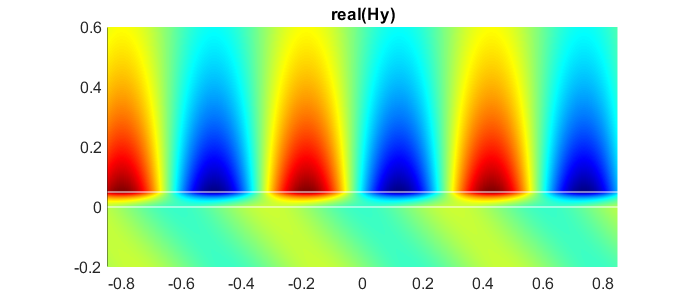

In [4]:
% Field calculation
[x,y,z] = deal(linspace(-lambda,lambda,200),0,linspace(-.2,.6,201)); % (xoz)
[E,H] = CalculFieldFMM(s,x,y,z);

% Plot Field distribution
figure('Position',[300  300  560  240]), hold on
VisuFieldFMM(real(H(:,2)),x,y,z), axis tight,title('real(Hy)')
plot([min(x) max(x)],[0 0],'w',[min(x) max(x)],[sum(geom) sum(geom)],'w')

## Absorptivity map versus wavelength and incident angle


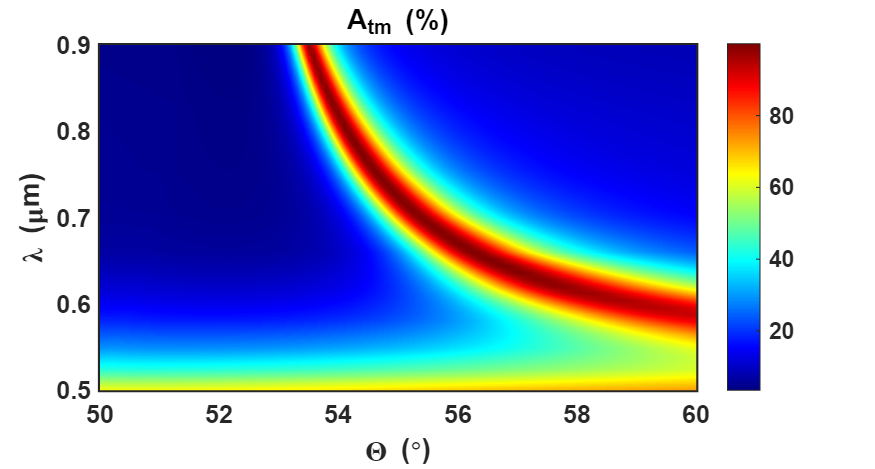

In [5]:
% Incident Plane Wave
lambda = linspace(.5,.9,51);        % Wavelength(µm)
theta = linspace(50,60,101)*pi/180; % Incident angle (rd)
inc = -1; % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle and wavelength
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc);
%
% Plot Absorptivity (A=1-R-T) versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,1-R_tm-T_tm), title('A_{tm} (%)')